# Exploratory Data Analysis

The notebook is divided on 2 parts:

1. Descriptive statistics of the data
2. Stationarity check of the data


## Part-1: Descriptive Statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.figsize']= (16, 12)

In [10]:
# load dataset
cleaned_df= pd.read_csv('..\data\cleaned_solar_irradiation.csv', index_col=0)
cleaned_df.head(5)

,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
2007-01-01,1,2007-01-01,14.400000,10.241667,57.500000,1015.058333,238.083333,4.200000,494.500000,76.333333,295.500000
2007-01-02,1,2007-01-02,13.525000,8.758333,56.416667,1015.616667,138.333333,1.258333,587.916667,65.083333,330.916667
2007-01-03,1,2007-01-03,12.975000,8.483333,61.333333,1010.066667,245.583333,0.850000,519.666667,84.833333,322.583333
2007-01-04,1,2007-01-04,11.950000,9.150000,51.583333,1004.166667,228.833333,2.541667,61.583333,89.833333,123.416667
2007-01-05,1,2007-01-05,12.933333,12.850000,60.416667,1001.766667,272.666667,7.991667,169.833333,86.416667,172.416667


In [3]:
# descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000
mean,6.521723,24.208450,16.723853,44.542575,999.447933,207.531111,3.668480,420.031257,139.588927,415.455158
std,3.448595,6.185242,5.232300,11.039721,5.554345,113.779221,1.333933,164.095435,40.847439,118.093168
min,1.000000,7.890909,3.772727,7.750000,985.585714,2.857143,0.518182,0.000000,17.300000,17.300000
25%,4.000000,18.654545,12.572321,38.000000,995.277692,86.774038,2.790909,327.814286,111.461538,330.937500
50%,7.000000,25.003571,16.426136,45.200000,998.964286,240.930952,3.550000,463.708333,132.714286,439.428571
75%,10.000000,29.660440,20.300000,51.416667,1003.100000,310.000000,4.307143,539.633523,162.199176,513.237500
max,12.000000,38.878571,38.553846,88.333333,1022.050000,357.416667,10.650000,765.250000,301.571429,607.785714


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [7]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5478 non-null   object 
 1   MonthPE          5478 non-null   int64  
 2   Date             5478 non-null   object 
 3   Daily_Temp       5478 non-null   float64
 4   Daily_Precip     5478 non-null   float64
 5   Daily_Humidity   5478 non-null   float64
 6   Daily_Pressure   5478 non-null   float64
 7   Daily_WindDir    5478 non-null   float64
 8   Daily_WindSpeed  5478 non-null   float64
 9   Daily_DNI        5478 non-null   float64
 10  Daily_DHI        5478 non-null   float64
 11  Daily_radiation  5478 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 513.7+ KB


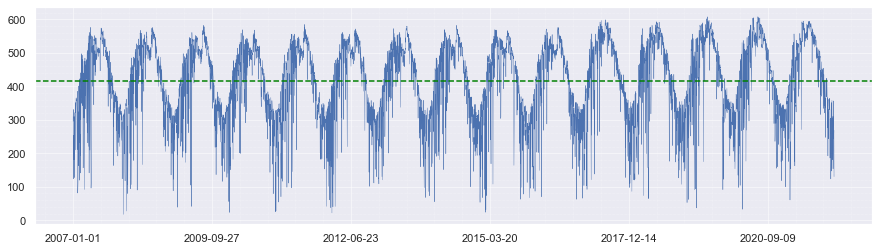

In [24]:
# daily radiation plot

sns.set(rc={'figure.figsize':(15, 4)})
ax = cleaned_df['Daily_radiation'].plot(linewidth=0.4)

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()

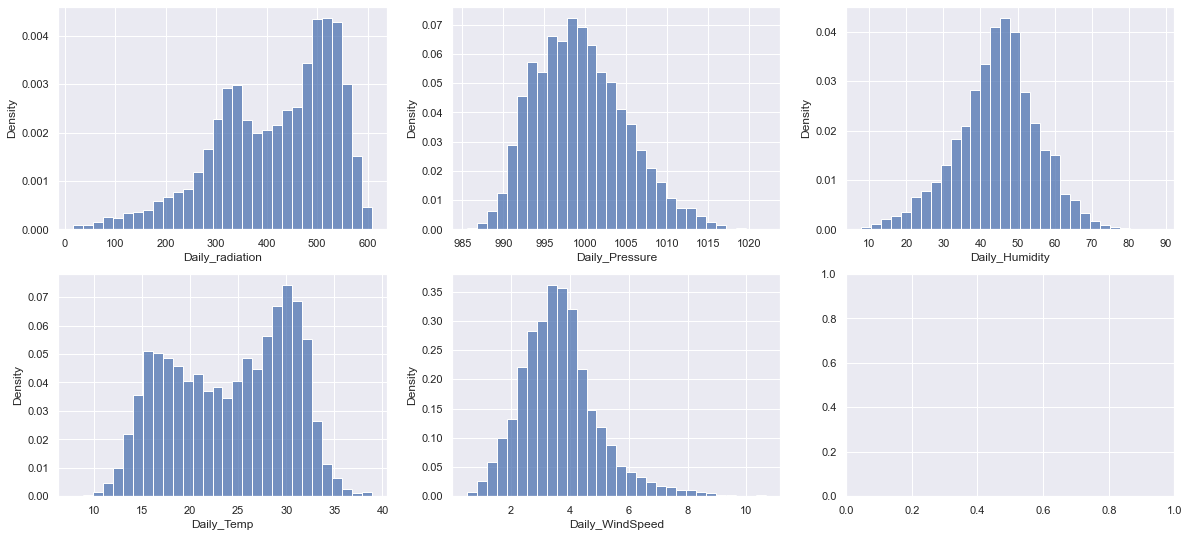

In [27]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(2, 3, figsize=(20,10))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0][0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[0][1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[0][2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[1][0])
sns.histplot(cleaned_df['Daily_WindSpeed'], stat="density", bins=30, ax=ax[1][1])
 
plt.show()

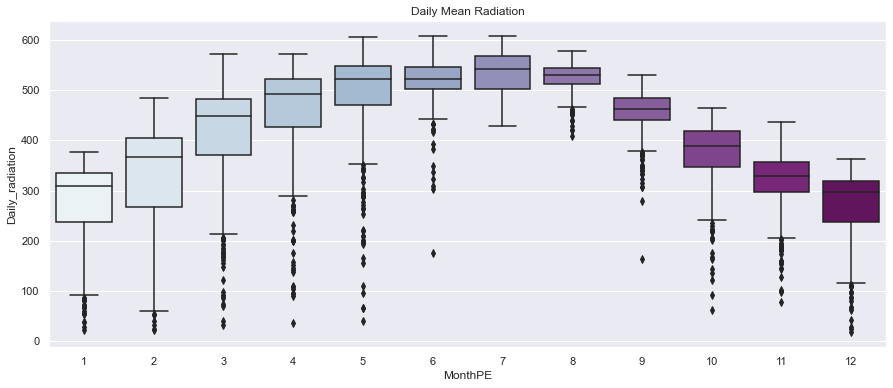

In [28]:
# box plot of monthly radiation distribution
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Monthly Radiation Distribution')
plt.show()

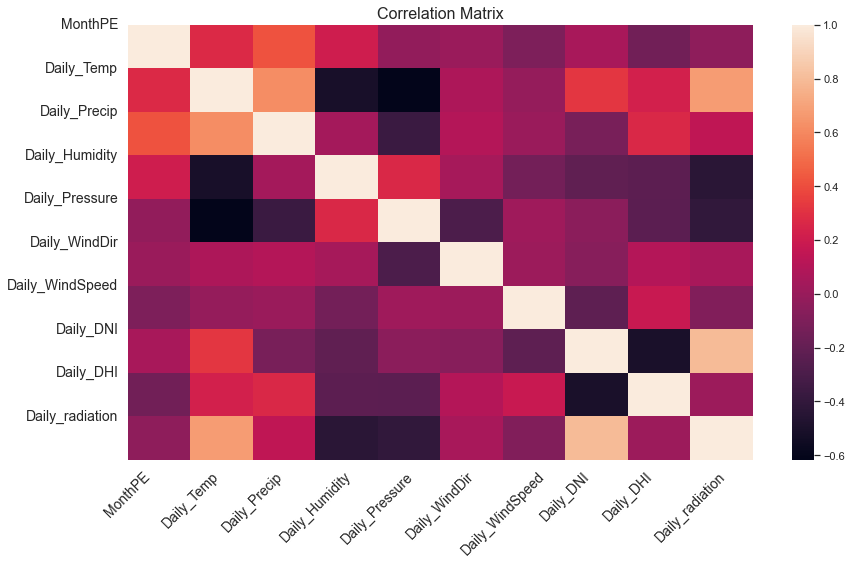

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(cleaned_df.corr())

plt.xticks(range(cleaned_df.select_dtypes(['number']).shape[1]), cleaned_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(cleaned_df.select_dtypes(['number']).shape[1]), cleaned_df.select_dtypes(['number']).columns, fontsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Statistical check: stationary or non-stationary

#### 1 - Check stationarity of the data using Augmented Dickey-Fuller test:

In [60]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -4.359078
p-value: 0.000350
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


As we are getting a p-value that is much less than 0.05, we can conclude that the data is stationary (aka, values don't depend on the time when they were recorded).

#### 2 - Check stationarity of the data using the Lag Plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


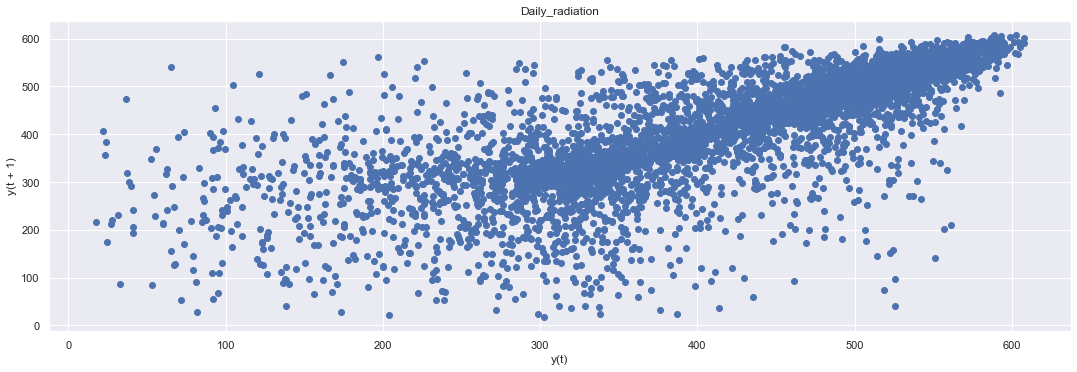

In [66]:
from pandas.plotting import lag_plot
   
f2, ax = plt.subplots(figsize=(15, 5))
f2.tight_layout()

cleaned_df['Daily_radiation'].plot().lag_plot()

lag_plot(cleaned_df['Daily_radiation'])
ax.set_title('Daily_radiation');

plt.show()

The lag plot shows that the underlying structure of the data is random, thus the data is stationary. 

#### 3 - Check stationarity of the data using the Rolling Statistics:

In the following plot, only the last 2 years are plotted to provide better visualization.

(730, 11)


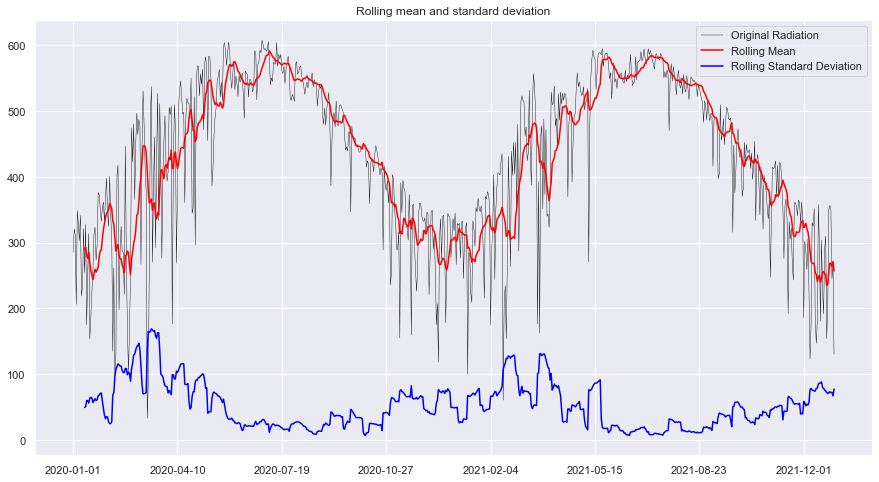

In [59]:
data_subset = cleaned_df[pd.to_datetime(cleaned_df.index) >= pd.to_datetime('2020-01-01')]
print(data_subset.shape)

rmean = data_subset['Daily_radiation'].rolling(window=12).mean()
rstd = data_subset['Daily_radiation'].rolling(window=12).std()

sns.set(rc={'figure.figsize':(15, 8)})
orig = data_subset['Daily_radiation'].plot(linewidth=0.4, color='black', label='Original Radiation')
mean = rmean.plot(color='red',label='Rolling Mean')
std = rstd.plot(color='blue',label = 'Rolling Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

Rolling statistics also confirms the same conclusion of the previous 2 methods, which is "the radiation data is observed to be stationary" ... And this is based on the high deviation of the rolling-mean & rolling-standered-deviation values. 